# Naive Bayes Classification

Over the next few tutorials, we are going to gain an intuition for classification by using multiple algorithms.  The datasets and examples being shown are from the [Classifier Comparision](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) We are also going to be appling each algorithm to the Iris dataset we previously worked with, using examples from [here](http://machinelearningmastery.com/get-your-hands-dirty-with-scikit-learn-now/)


For now I am just presenting the results of the algorithm for you to gain intuition, later we will learn cross validation, model evaluation, and parameter tuning.

In this tutorial, we are going to go over naive bayes classification.  The corresponding lecture notes (http://datascienceguide.github.io/naive-bayes-classifier/) provides the intuition and explanation for naive bayes.  Let us jump into a simple example by first creating 3 datasets for classification and applying naive bayes.  Later in the tutorial we will use naive bayes to classify the Iris dataset (and an example with some text data).



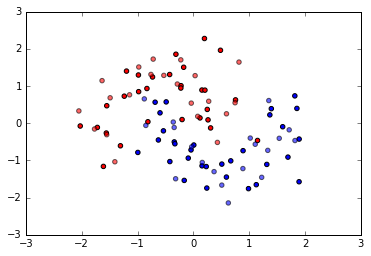

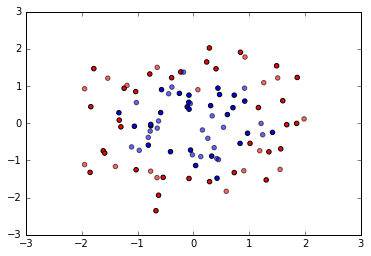

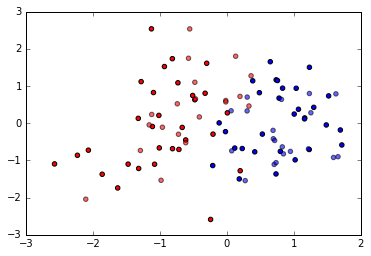

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


h = .02  # step size in the mesh

names = ["Naive Bayes"]
classifiers = [
    GaussianNB()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

#figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.figure(i)
    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

    i += 1

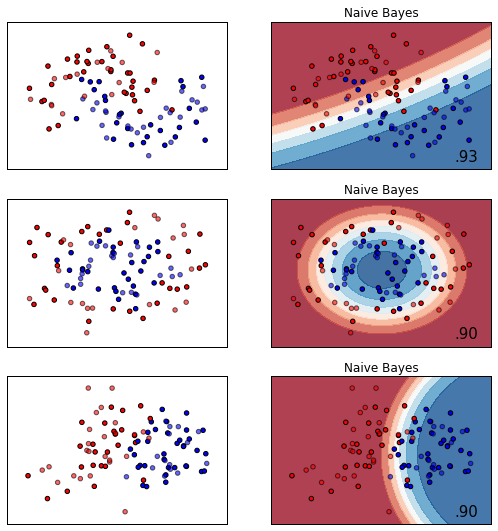

In [2]:
figure = plt.figure(figsize=(7, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

Here we can see the intuition on how naive bayes seperates the different classes.   As we can see, if the assumption of independant features, the model might generalize well.  The main advantage of the naive bayes method is the simplicity and speed.  

# Naive Bayes on Iris Dataset 

Now we are going to apply a Naive Bayes classifier to the Iris dataset we previously worked with.  Note, for this example I am not using cross validation since I just wanted to show standalone,
simple and consistent code for each classifier first.  Normally you should always use cross validation!




In [3]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# load the iris datasets
dataset = datasets.load_iris()
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


GaussianNB()
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Optional: Text Classification ( Natural Language Processsing)

For example if you wanted to classify new groups (or emails), naive bayes offers a very fast approach using a "bag of words".  

[![](http://www.python-course.eu/images/document_representation.png)](http://www.python-course.eu/images/document_representation.png)

This example is a bit advanced and outlines the use of a different evaluation metric (ROC), it shows the speed of naive bayes with text.

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


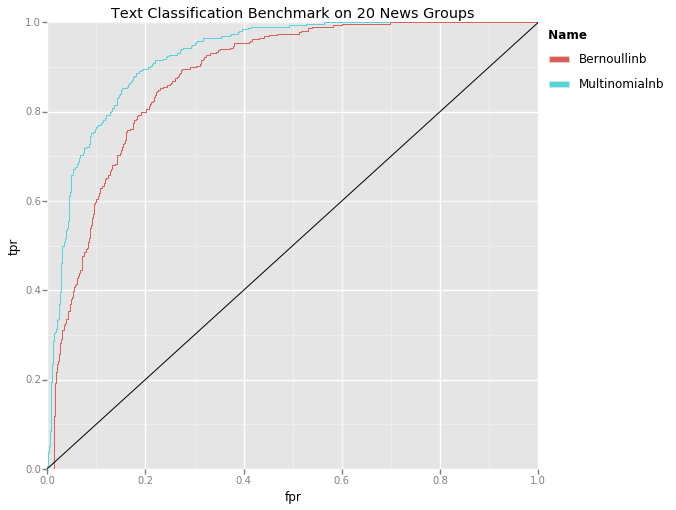

<ggplot: (8759938007661)>

In [5]:
import pandas as pd
from ggplot import *
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import roc_curve

# vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# our classifiers
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
        shuffle=True, random_state=42)

data_test = fetch_20newsgroups(subset='test', categories=categories,
        shuffle=True, random_state=42)

categories = data_train.target_names

vectorizer = HashingVectorizer(stop_words='english', non_negative=True, n_features=1000)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

y_train = data_train.target==0
y_test = data_test.target==0



clfs = [
    ("MultinomialNB", MultinomialNB()),
    ("BernoulliNB", BernoulliNB()),
]

all_results = None
for name, clf in clfs:
    clf.fit(X_train.todense(), y_train)
    probs = clf.predict_proba(X_test.todense())[:,1]
    fpr, tpr, thresh = roc_curve(y_test, probs)
    results = pd.DataFrame({
        "name": name,
        "fpr": fpr,
        "tpr": tpr
    })
    if all_results is None:
        all_results = results
    else:
        all_results = all_results.append(results)

ggplot(aes(x='fpr', y='tpr', color='name'), data=all_results) + \
    geom_step() + \
    geom_abline(color="black") + \
    ggtitle("Text Classification Benchmark on 20 News Groups")